<a href="https://colab.research.google.com/github/lucianesantos/PosTechData/blob/main/TechChalenge_Fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tech Challenge - Luciane dos Santos Reis

Importando a base de dados do Ibovespa - Fonte: https://br.investing.com/indices/bovespa-historical-data

Baixei a base com o intervalo de tempo de 20 anos, de Agosto de 2003 a Agosto de 2023, para atingir a maior acuracidade no modelo preditivo.

# Dicionário


**Último** - Fechamento da Bolsa, posição Final do dia, índice

**Abertura** - Ponto de início das negociações que normalmente é o dia anterior. Só será diferente do dia anterior, caso haja uma catástrofe econômica.

**Máxima** - Ponto máximo do dia

**Mínima** - Ponto mínino do dia -  Ponto mais baixo da bolsa em um dia.

**Vol**. - Quantidade de ações negociadas no dia, em Milhões de Ações

**Var**% - Percentual de variáção de um dia para outro.

In [4]:
#import das bibliotecas a serem usadas na análise dos dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados_ibovespa = pd.read_csv("https://github.com/lucianesantos/PosTechData/blob/main/Dados_Ibovespa.csv", sep=',')
dados_ibovespa.head()

ParserError: ignored

Conhecendo a base:
Verificando o tamanho; Se há dados Nulos


In [3]:
#Tamanho da Base
len(dados_ibovespa)

4957

In [4]:
#Dados Nulos
dados_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [27]:
dados_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4957 non-null   object 
 1   Último    4957 non-null   float64
 2   Abertura  4957 non-null   float64
 3   Máxima    4957 non-null   float64
 4   Mínima    4957 non-null   float64
 5   Vol.      4956 non-null   object 
 6   Var%      4957 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.2+ KB


Realizando algumas transformações

In [45]:
#Transformando a variável Var% de percentual para decimal
dados_ibovespa['Var_decimal'] = dados_ibovespa['Var%'].str.replace("%","")

#Substituindo a vírgula por ponto
dados_ibovespa['Var_decimal'] = dados_ibovespa['Var_decimal'].str.replace(",",".")

#transformando a variável Var_decimal no tipo Float
dados_ibovespa['Var_decimal'] = dados_ibovespa['Var_decimal'].astype(float)
#Fiz essa transformação para tentar ver a correção dessa variável

In [58]:
#Renomeando as variáveis para retirar o acento
dados_ibovespa.columns = ["data", "ultimo", "abertura", "maxima", "minima", "vol", "var_percent", "var_decimal"]

In [84]:
#transformando a data em tipo DATE
dados_ibovespa["data"] = pd.to_datetime(dados_ibovespa["data"])


KeyError: ignored

In [82]:
dados_ibovespa.head(2)

,data,ultimo,abertura,maxima,minima,vol,var_percent,var_decimal
0,2023-11-08,118.065,118.350,119.054,117.415,"11,87M","-0,24%",-0.24
1,2023-10-08,118.350,118.412,119.438,118.113,"12,69M","-0,05%",-0.05


In [72]:
dados_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         4957 non-null   datetime64[ns]
 1   ultimo       4957 non-null   float64       
 2   abertura     4957 non-null   float64       
 3   maxima       4957 non-null   float64       
 4   minima       4957 non-null   float64       
 5   vol          4956 non-null   object        
 6   var_percent  4957 non-null   object        
 7   var_decimal  4957 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 309.9+ KB


ANÁLISE EXPLORATÓRIA DE DADOS

Text(0.5, 1.0, 'Histograma da Variável Ultimo')

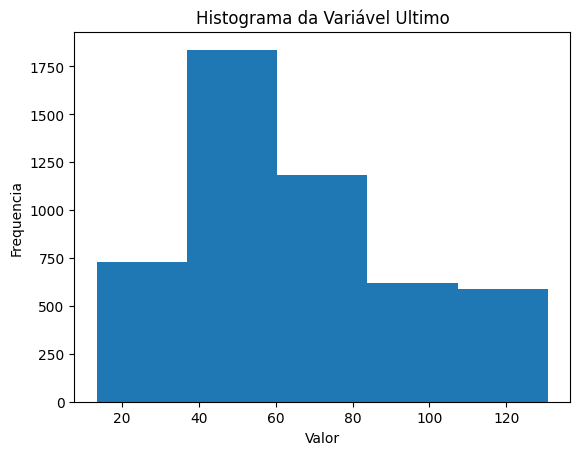

In [73]:
#Histograma do índice/variável ultimo.

plt.hist(dados_ibovespa['ultimo'], bins=5)

plt.xlabel('Valor')
plt.ylabel('Frequencia')
plt.title ('Histograma da Variável Ultimo')


**NOTA** - O indice - variável ultimo - que são os pontos da bolsa, se mantém entre 40 a 60 na maior frequencia

Text(0.5, 1.0, 'Histograma da Variável var_decimal')

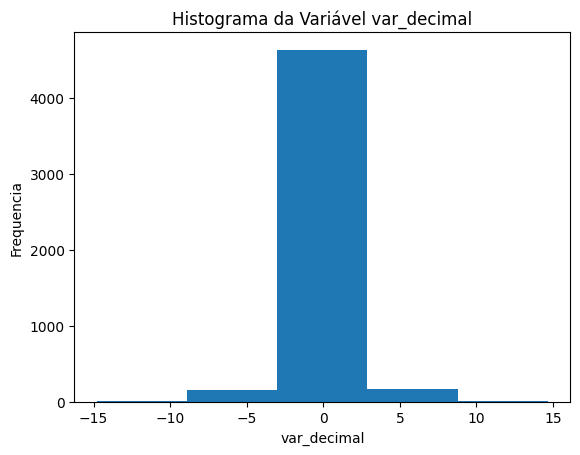

In [74]:
#Histograma da variável var_decimal

plt.hist(dados_ibovespa['var_decimal'], bins=5)

plt.xlabel('var_decimal')
plt.ylabel('Frequencia')
plt.title ('Histograma da Variável var_decimal')

**NOTA-**  a variação se mantém entre -2,5 e +2,5 em maior frenquencia por 20 anos

Sem efetuar nenhuma análise de dados, compreendo que as variáveis principais são o índice - Variável Último e a Variável Var%, a Variáção. Vou fazer um gráfico de barras para demonstrar a variáção da bolsa e mesmo assim, farei uma matriz de correlação.  

mostrar   a média de algo?


quem é a variável depenente e a independente

<ipython-input-66-b95622483294>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=dados_ibovespa.corr()


<Axes: >

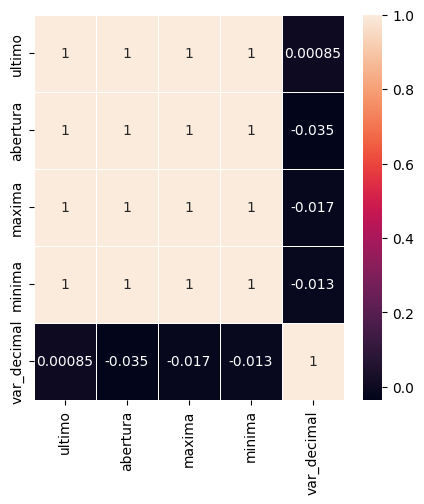

In [66]:
#Matriz de Correlação

correlation_matrix=dados_ibovespa.corr()
#correlation_matrix=dados_ibovespa.corr().round(2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5,ax=ax)



**NOTA -** Ao realizar a matrix de correlação, nota-se que todas as variáveis se correlacionam entre si, excepto, a variação (variável var_decimal) que possuui uma correlção negativa

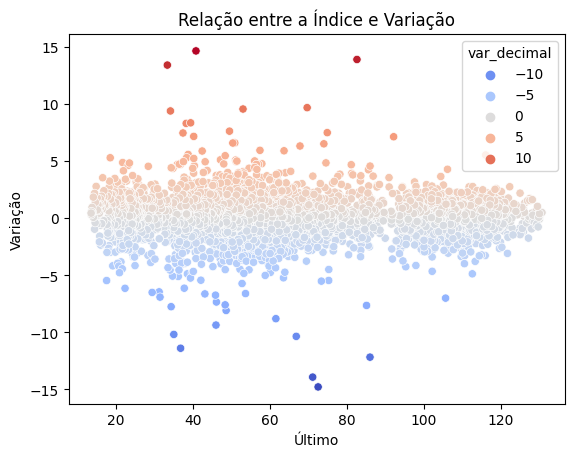

In [68]:
sns.scatterplot(x="ultimo", y="var_decimal", hue="var_decimal" ,data=dados_ibovespa, palette="coolwarm")
plt.xlabel("Último")
plt.ylabel ("Variação")
plt.title("Relação entre a Índice e Variação")
plt.show()

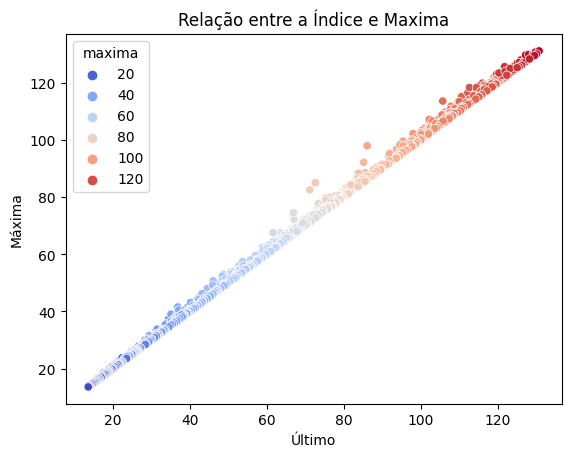

In [69]:
sns.scatterplot(x="ultimo", y="maxima", hue="maxima" ,data=dados_ibovespa, palette="coolwarm")
plt.xlabel("Último")
plt.ylabel ("Máxima")
plt.title("Relação entre a Índice e Maxima")
plt.show()

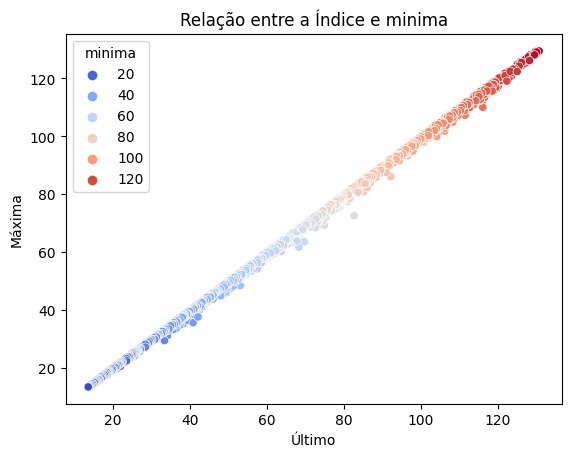

In [70]:
sns.scatterplot(x="ultimo", y="minima", hue="minima" ,data=dados_ibovespa, palette="coolwarm")
plt.xlabel("Último")
plt.ylabel ("Máxima")
plt.title("Relação entre a Índice e minima")
plt.show()

cabe um gráfico de dispersão? pra provar a correlação? para mostrar duas variáveis correlacionadas?

<Axes: xlabel='Var%', ylabel='Count'>

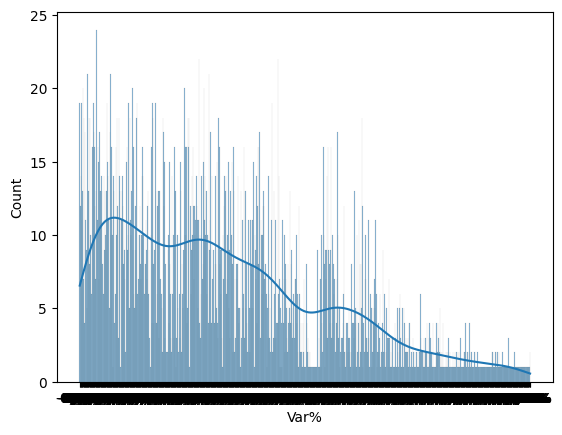

In [11]:
sns.histplot(data=dados_ibovespa, x="Var%", kde=True)

<Axes: xlabel='Último', ylabel='Count'>

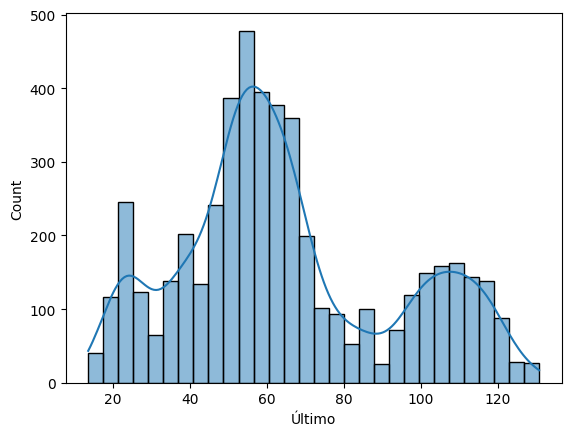

In [12]:
sns.histplot(data=dados_ibovespa, x="Último", kde=True)

histograma e densidade que analisa a distribuição -NÃO CABE AQUI ANÁLISE DE NORMALIDADE não preecisa de shapiro para ver se a distribuição é normal

SEPARAR EM ANÁLISE EXPLORATÓRIA DOS DADOS E O PROXIMO PASSO PARA A PREPARAÇÃO PARA MACHINE LEARNING


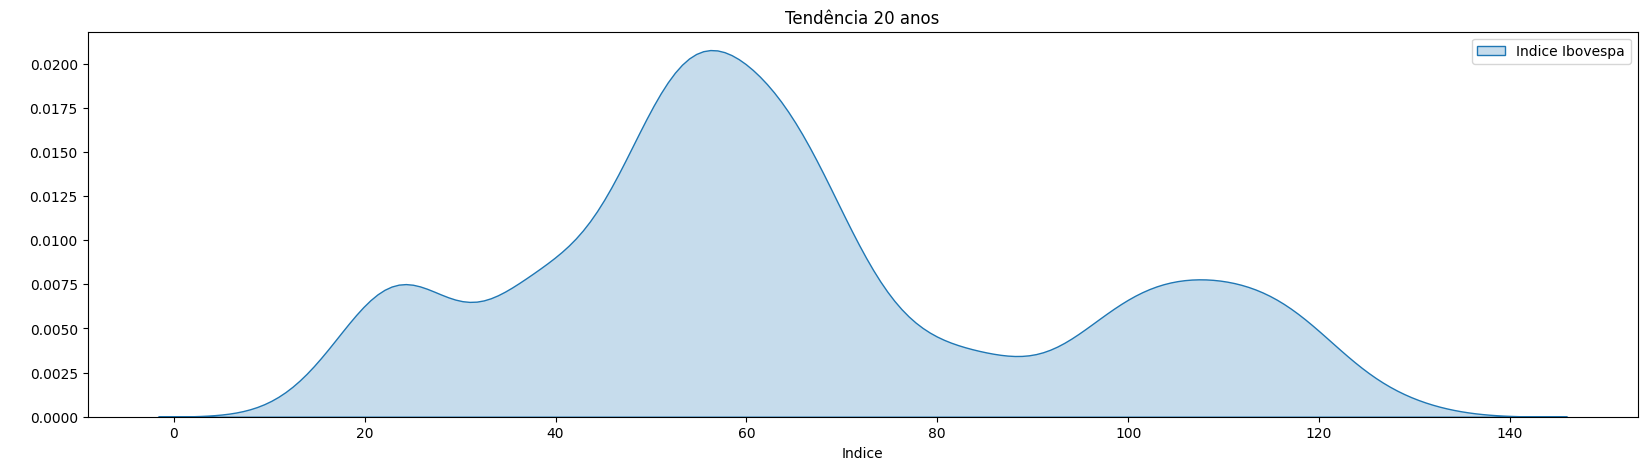

In [9]:
#Grafico de Densidade mostrando a Tendência do índice em 20 anos
plt.figure(figsize=(20,5))

sns.kdeplot(data=dados_ibovespa['Último'], label="Indice Ibovespa", fill=True)


plt.title("Tendência 20 anos")
plt.xlabel("Indice")
plt.ylabel(" ")
plt.legend()

fazer um grafico da variaçõao igual ao site da bolsa e explicar que ela tem uma tendencia de alta. de vez em quando tem algum problema que faz com que ela caia, mas em geral a bolsa brasileira acaba subindo. ELA PASSA por momentos estáveis mas ela cai.
O DIFÍCIL É prever o futuro de curto prazo\projeção diária
DEVIDO A EVENTOS economicos como a fraude das americanas. ISSO não é possivel prever.


variavel target - indice e variação -
fazer correlação  PARA IDENTIFICR VARIÁVEIS CORRELACIONADAS

MACHINE LEARNING PARA PREVER A VARIAÇÃO


COLOCAR ATÉ 30-6 E VER SE A PROJEÇÃO DE JULHO CORRESPONDE
problema - eventos que fogem (banco central reduzir a taxa de juros)